* Ссылки 
  * [Разведочный анализ данных](https://www.kaggle.com/emstrakhov/eda-with-pandas).<br>
  * [Построение графиков](https://pcnews.ru/blogs/spargalka_po_vizualizacii_dannyh_v_python_s_pomosu_plotly-986119.html).<br>
  * [Продвинутая визуализация](https://habr.com/ru/company/skillfactory/blog/510320/).<br>
  * [Machine Learning course](https://mlcourse.ai/).<br>
  * [Фреймы в pandas](https://habr.com/ru/company/ruvds/blog/494720/)<br>
  * [Открытие фрейма в pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)<br>

In [1]:
from pylab import rcParams
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import numpy as np
import pandas as pd
import plotly
from IPython.display import Image
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 8
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format
InteractiveShell.ast_node_interactivity = 'all'

df = pd.read_csv('df.csv')

In [2]:
pd.set_option('display.max_rows', 100)
df.head().T

,0,1,2,3,4
SEQN,"83,732.0","83,733.0","83,734.0","83,735.0","83,736.0"
ALQ101,1.0,1.0,1.0,2.0,2.0
ALQ110,nan,nan,nan,1.0,1.0
ALQ130,1.0,6.0,nan,1.0,1.0
SMQ020,1.0,1.0,1.0,2.0,2.0
RIAGENDR,1.0,1.0,1.0,2.0,2.0
RIDAGEYR,62.0,53.0,78.0,56.0,42.0
RIDRETH1,3.0,3.0,3.0,3.0,4.0
DMDCITZN,1.0,2.0,1.0,1.0,1.0
DMDEDUC2,5.0,3.0,3.0,5.0,4.0


In [3]:
# Преобразуем числовые данные в объектные
df['RIAGENDR'] = df.RIAGENDR.replace({1: "Male", 2: "Female"})
df['DMDEDUC2'] = df.DMDEDUC2.replace(
    {1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 7: "Refused", 9: "Don't know"})
df['DMDMARTL'] = df.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced",
                                      4: "Separated", 5: "Never married", 6: "Living w/partner", 77: "Refused"})

In [24]:
# Добавим новый столбец, с массой тела, умноженной на 10
df["dot_size"] = df.BMXBMI*10

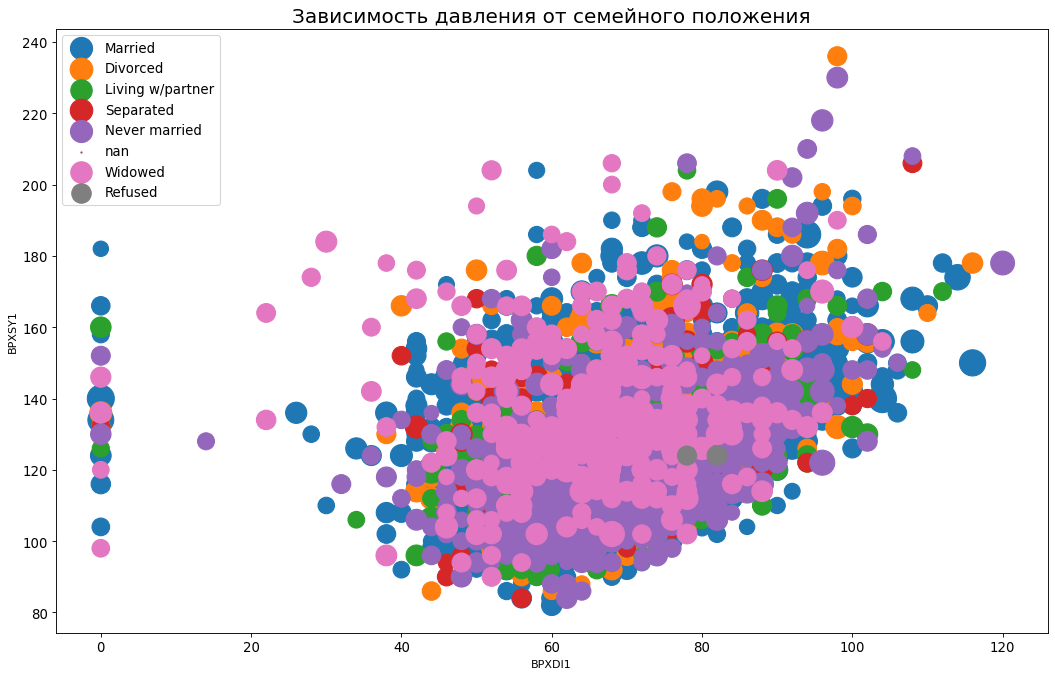

In [25]:
# Диаграмма рассеяния
category = df['DMDMARTL'].unique()

plt.figure(figsize=(16, 10), dpi=80, facecolor="w", edgecolor="k")
for i, cat in enumerate(category):
    plt.scatter("BPXDI1", "BPXSY1", # X Y 
                data=df.loc[df.DMDMARTL == cat, :], # В каждом цикле проходим по одному значению переменных из колонки
                s='dot_size', # ЗАвисимость размера точки от значения в другой колонке фрейма
                label=str(cat))

plt.gca().set(xlabel='BPXDI1', ylabel='BPXSY1')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Зависимость давления от семейного положения", fontsize=18)
plt.legend(fontsize=12)
plt.show();